In [1]:
import warnings as wns
wns.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
df = pd.read_csv('./data/hotdayops.csv', encoding='EUC-KR')
df.head()

,date,avgTemp,minTemp,maxTemp,avgWind,OPS,최정,전준우,로하스,페르난데스,김현수,최형우,러프,로맥,유한준,샌즈
0,2019-03-24,4.3,-0.8,9.7,2.3,0.5920,0.125,0.875,0.375,0.833,0.347,0.250,0.476,1.250,0.500,0.889
1,2019-03-26,11.4,7.4,17.6,2.0,0.5892,0.083,0.750,0.377,0.775,0.496,0.258,1.021,0.833,0.615,0.684
2,2019-03-27,11.6,8.9,16.2,3.0,0.6609,0.243,1.063,0.603,1.000,0.503,0.435,1.117,0.625,0.513,0.507
3,2019-03-28,9.4,5.6,14.6,2.6,0.7397,0.195,1.048,0.772,0.874,0.400,0.759,1.167,0.750,0.634,0.798
4,2019-03-29,9.2,5.5,15.1,2.1,0.7113,0.383,0.960,0.747,0.921,0.333,0.634,1.060,0.720,0.637,0.718


In [4]:
df.drop(['date', '최정', '전준우', '로하스', '페르난데스', '김현수', '최형우', '러프', 
                '로맥', '유한준', '샌즈'], axis=1, inplace=True)
df.head()

,avgTemp,minTemp,maxTemp,avgWind,OPS
0,4.3,-0.8,9.7,2.3,0.5920
1,11.4,7.4,17.6,2.0,0.5892
2,11.6,8.9,16.2,3.0,0.6609
3,9.4,5.6,14.6,2.6,0.7397
4,9.2,5.5,15.1,2.1,0.7113


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'minTemp and OPS in 2d plane')

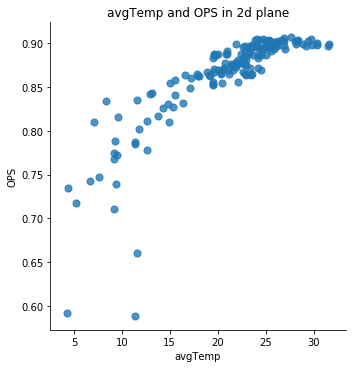

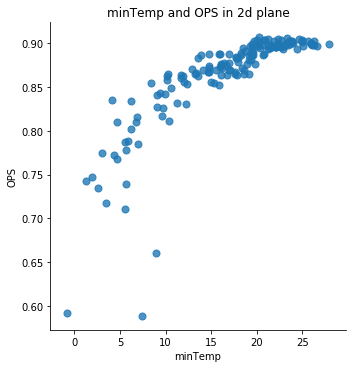

In [7]:
sns.lmplot(x='avgTemp', y='OPS', data=df, fit_reg=False, scatter_kws={'s': 50})                                
plt.title('avgTemp and OPS in 2d plane')
sns.lmplot(x='minTemp', y='OPS', data=df, fit_reg=False, scatter_kws={'s': 50})
plt.title('minTemp and OPS in 2d plane')

Text(0.5, 1, 'avgWind and OPS in 2d plane')

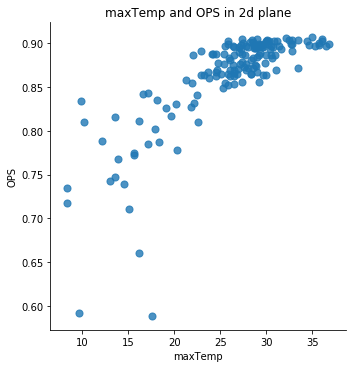

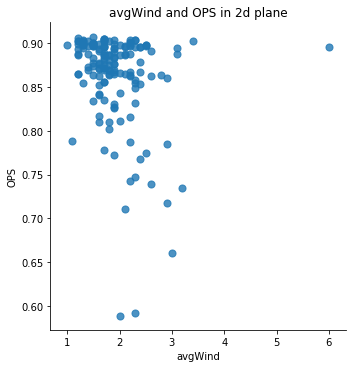

In [8]:
sns.lmplot(x='maxTemp', y='OPS', data=df, fit_reg=False, scatter_kws={'s': 50})
plt.title('maxTemp and OPS in 2d plane')
sns.lmplot(x='avgWind', y='OPS', data=df, fit_reg=False, scatter_kws={'s': 50})
plt.title('avgWind and OPS in 2d plane')

In [10]:
data = np.array(df, dtype=np.float32)
print(type(data))
data

<class 'numpy.ndarray'>


array([[ 4.3   , -0.8   ,  9.7   ,  2.3   ,  0.592 ],
       [11.4   ,  7.4   , 17.6   ,  2.    ,  0.5892],
       [11.6   ,  8.9   , 16.2   ,  3.    ,  0.6609],
       [ 9.4   ,  5.6   , 14.6   ,  2.6   ,  0.7397],
       [ 9.2   ,  5.5   , 15.1   ,  2.1   ,  0.7113],
       [ 5.2   ,  3.5   ,  8.4   ,  2.9   ,  0.7172],
       [ 4.4   ,  2.6   ,  8.4   ,  3.2   ,  0.735 ],
       [ 6.7   ,  1.3   , 13.    ,  2.2   ,  0.7429],
       [ 7.6   ,  1.9   , 13.6   ,  2.3   ,  0.7474],
       [ 9.2   ,  3.    , 15.7   ,  2.5   ,  0.7744],
       [11.4   ,  7.    , 17.2   ,  2.9   ,  0.7854],
       [ 9.3   ,  5.9   , 12.2   ,  1.1   ,  0.7887],
       [12.6   ,  5.6   , 20.3   ,  1.7   ,  0.7779],
       [ 9.2   ,  4.7   , 13.9   ,  2.4   ,  0.7681],
       [ 7.1   ,  4.7   , 10.2   ,  1.8   ,  0.8104],
       [ 9.5   ,  4.3   , 15.7   ,  1.9   ,  0.7722],
       [11.4   ,  5.5   , 18.4   ,  2.2   ,  0.7869],
       [11.8   ,  6.2   , 17.9   ,  1.8   ,  0.8025],
       [ 9.6   ,  6.9   , 13

In [11]:
xData = data[:, 0:4]
print(type(xData))
print(xData)

<class 'numpy.ndarray'>
[[ 4.3 -0.8  9.7  2.3]
 [11.4  7.4 17.6  2. ]
 [11.6  8.9 16.2  3. ]
 [ 9.4  5.6 14.6  2.6]
 [ 9.2  5.5 15.1  2.1]
 [ 5.2  3.5  8.4  2.9]
 [ 4.4  2.6  8.4  3.2]
 [ 6.7  1.3 13.   2.2]
 [ 7.6  1.9 13.6  2.3]
 [ 9.2  3.  15.7  2.5]
 [11.4  7.  17.2  2.9]
 [ 9.3  5.9 12.2  1.1]
 [12.6  5.6 20.3  1.7]
 [ 9.2  4.7 13.9  2.4]
 [ 7.1  4.7 10.2  1.8]
 [ 9.5  4.3 15.7  1.9]
 [11.4  5.5 18.4  2.2]
 [11.8  6.2 17.9  1.8]
 [ 9.6  6.9 13.6  2.2]
 [14.9  6.8 22.6  1.6]
 [15.3  9.1 21.8  1.9]
 [12.6 10.4 16.2  2. ]
 [13.8  9.6 19.7  1.6]
 [14.3  9.7 19.1  1.9]
 [14.8 12.2 20.2  1.9]
 [20.4 15.3 25.5  1.3]
 [19.5 15.8 25.9  1.6]
 [13.2  9.4 17.2  2. ]
 [ 8.4  6.2  9.9  1.5]
 [11.6  4.1 18.2  1.7]
 [12.9  9.9 16.6  1.6]
 [15.5  9.  22.5  1.6]
 [16.4 11.2 22.2  2.3]
 [17.1 10.6 25.3  2.3]
 [17.9 10.1 26.1  1.6]
 [19.5 12.  27.4  1.7]
 [19.2 13.6 26.5  2.2]
 [15.   8.4 21.9  2.3]
 [15.6 10.1 21.3  2.3]
 [16.6 11.7 22.9  2.2]
 [17.8 10.3 26.8  1.9]
 [20.3 13.2 28.3  1.8]
 [21.6 14.

In [12]:
yData = data[:, 4:]
print(type(yData))
print(yData)

<class 'numpy.ndarray'>
[[0.592 ]
 [0.5892]
 [0.6609]
 [0.7397]
 [0.7113]
 [0.7172]
 [0.735 ]
 [0.7429]
 [0.7474]
 [0.7744]
 [0.7854]
 [0.7887]
 [0.7779]
 [0.7681]
 [0.8104]
 [0.7722]
 [0.7869]
 [0.8025]
 [0.8156]
 [0.8099]
 [0.8266]
 [0.8113]
 [0.817 ]
 [0.8259]
 [0.831 ]
 [0.8542]
 [0.8524]
 [0.8432]
 [0.8336]
 [0.8349]
 [0.8419]
 [0.8405]
 [0.8313]
 [0.8484]
 [0.8624]
 [0.8554]
 [0.8629]
 [0.8541]
 [0.8582]
 [0.8638]
 [0.8645]
 [0.8647]
 [0.8739]
 [0.8709]
 [0.871 ]
 [0.8632]
 [0.8647]
 [0.8651]
 [0.8597]
 [0.8538]
 [0.8561]
 [0.8713]
 [0.8719]
 [0.8691]
 [0.8628]
 [0.8664]
 [0.8665]
 [0.8631]
 [0.8669]
 [0.8689]
 [0.8669]
 [0.8633]
 [0.8643]
 [0.8697]
 [0.8722]
 [0.8695]
 [0.8698]
 [0.8747]
 [0.8748]
 [0.8808]
 [0.8784]
 [0.8756]
 [0.8773]
 [0.8761]
 [0.8765]
 [0.8804]
 [0.8826]
 [0.8859]
 [0.891 ]
 [0.8973]
 [0.9021]
 [0.9043]
 [0.8868]
 [0.9033]
 [0.9032]
 [0.9049]
 [0.9035]
 [0.9074]
 [0.9049]
 [0.903 ]
 [0.9025]
 [0.8988]
 [0.8976]
 [0.8952]
 [0.893 ]
 [0.8945]
 [0.8988]
 [0.90

In [13]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 4]) 
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [14]:
a = tf.Variable(tf.random_uniform([4, 1]), dtype=tf.float32)
b = tf.Variable(tf.random_uniform([1]), dtype=tf.float32)

In [15]:
y = tf.matmul(X, a) + b
loss = tf.reduce_mean(tf.square(y - Y))
gradient_descent = tf.train.GradientDescentOptimizer(0.0000000002).minimize(loss)

In [16]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(12000001):
    loss_, y_, _ = sess.run([loss, y, gradient_descent], feed_dict={X: xData, Y: yData})
    if i % 100000 == 0:
        print('Epoch: {0:8d}, loss: {1:5.3f}, price: {2:3.3f}'.format(i, loss_, y_[0][0]))

saver = tf.train.Saver()
save_path = saver.save(sess, './data/temp_ops.cpkt')
print('학습된 모델을 저장했습니다.')

Epoch:        0, loss: 260.483, price: 4.705
Epoch:   100000, loss: 230.102, price: 4.485
Epoch:   200000, loss: 204.787, price: 4.290
Epoch:   300000, loss: 181.958, price: 4.098
Epoch:   400000, loss: 160.874, price: 3.908
Epoch:   500000, loss: 143.041, price: 3.745
Epoch:   600000, loss: 126.826, price: 3.590
Epoch:   700000, loss: 111.843, price: 3.437
Epoch:   800000, loss: 98.653, price: 3.287
Epoch:   900000, loss: 87.779, price: 3.163
Epoch:  1000000, loss: 78.351, price: 3.047
Epoch:  1100000, loss: 69.654, price: 2.933
Epoch:  1200000, loss: 61.617, price: 2.821
Epoch:  1300000, loss: 54.588, price: 2.719
Epoch:  1400000, loss: 48.737, price: 2.625
Epoch:  1500000, loss: 43.217, price: 2.531
Epoch:  1600000, loss: 38.168, price: 2.441
Epoch:  1700000, loss: 33.955, price: 2.364
Epoch:  1800000, loss: 30.164, price: 2.290
Epoch:  1900000, loss: 26.706, price: 2.216
Epoch:  2000000, loss: 23.646, price: 2.143
Epoch:  2100000, loss: 21.104, price: 2.083
Epoch:  2200000, loss: 1

mkvryu@naver.com